In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import warnings 
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [4]:
df_train=pd.read_csv(r"E:\聊天信息\WeChat Files\wxid_3m99ry7xvpb922\FileStorage\File\2025-02\train.csv")
df_test=pd.read_csv(r"E:\聊天信息\WeChat Files\wxid_3m99ry7xvpb922\FileStorage\File\2025-02\test.csv")
sample_submission = pd.read_csv(r"E:\聊天信息\WeChat Files\wxid_3m99ry7xvpb922\FileStorage\File\2025-02\sample_submission.csv")
# df_train
# df_test
sample_submission

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0
...,...,...
127032,508142,0
127033,508143,0
127034,508144,0
127035,508145,0


In [5]:
df_train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [6]:
df_test.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [7]:
def NullValues(data):
    null_values = data.isnull().sum()
    duplicate_values = data.duplicated().sum()
    print(f"Null Values: \n{null_values}\n\nDuplicate Values: {duplicate_values}")

In [8]:
NullValues(df_train)

Null Values: 
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Duplicate Values: 0


In [9]:
df_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


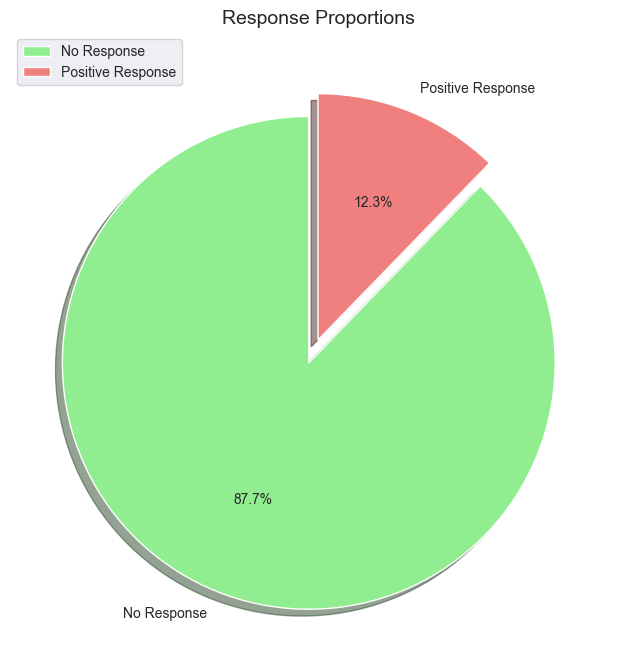

In [10]:
if 'Response' in df_train.columns and df_train['Response'].nunique() > 1:
    response_counts = df_train['Response'].value_counts()
    
    plt.figure(figsize=(8, 8))
    explode = (0.1, 0)  

    plt.pie(response_counts, labels=['No Response', 'Positive Response'], autopct='%1.1f%%',
            colors=['lightgreen', 'lightcoral'], startangle=90, shadow=True, explode=explode)
    
    plt.title('Response Proportions', fontsize=14)  
    plt.legend(loc="best") 
    plt.show()
else:
    print("The 'Response' column is missing or does not have enough categories to plot.")

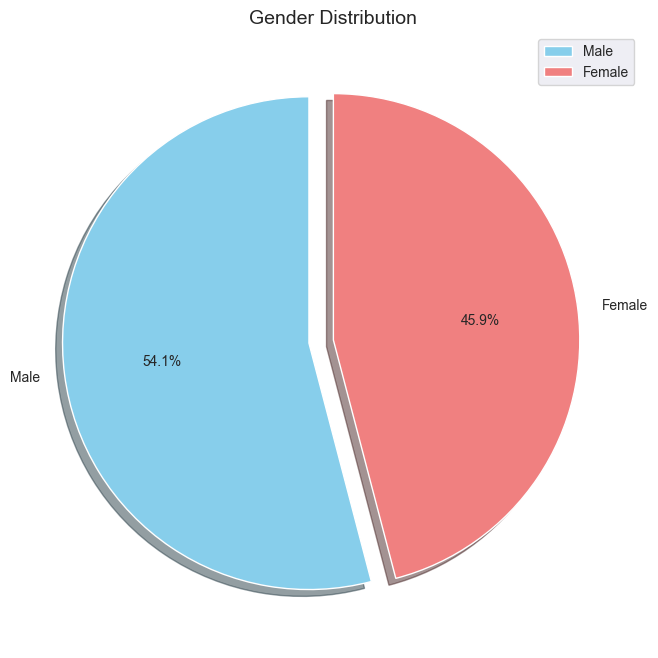

In [11]:
if 'Gender' in df_train.columns and df_train['Gender'].nunique() > 1:
	gender_counts = df_train['Gender'].value_counts()
	
	plt.figure(figsize=(8, 8))
	explode = (0.1, 0)  
	plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
			colors=['skyblue', 'lightcoral'], startangle=90, shadow=True, explode=explode)
	
	plt.title('Gender Distribution', fontsize=14)  
	plt.legend(loc='best')  
	plt.show()
else:
	print("The 'Gender' column is missing or does not have enough categories to plot.")

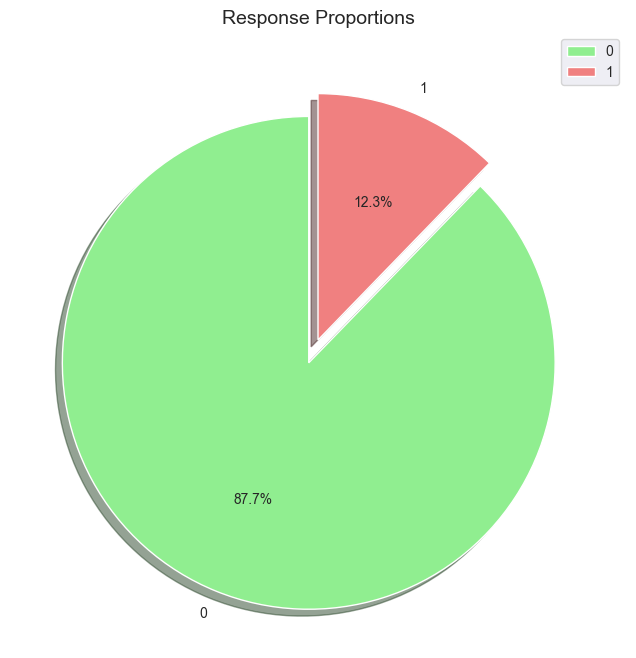

In [12]:
if 'Response' in df_train.columns and df_train['Response'].nunique() > 1:
    response_counts = df_train['Response'].value_counts()
    
    plt.figure(figsize=(8, 8))  
    explode = (0.1, 0)  
    
    plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%',
            colors=['lightgreen', 'lightcoral'], startangle=90, shadow=True, explode=explode)
    
    plt.title('Response Proportions', fontsize=14)
    plt.legend(loc="best")  
    plt.show()
else:
    print("The 'Response' column is missing or does not have enough categories to plot.")

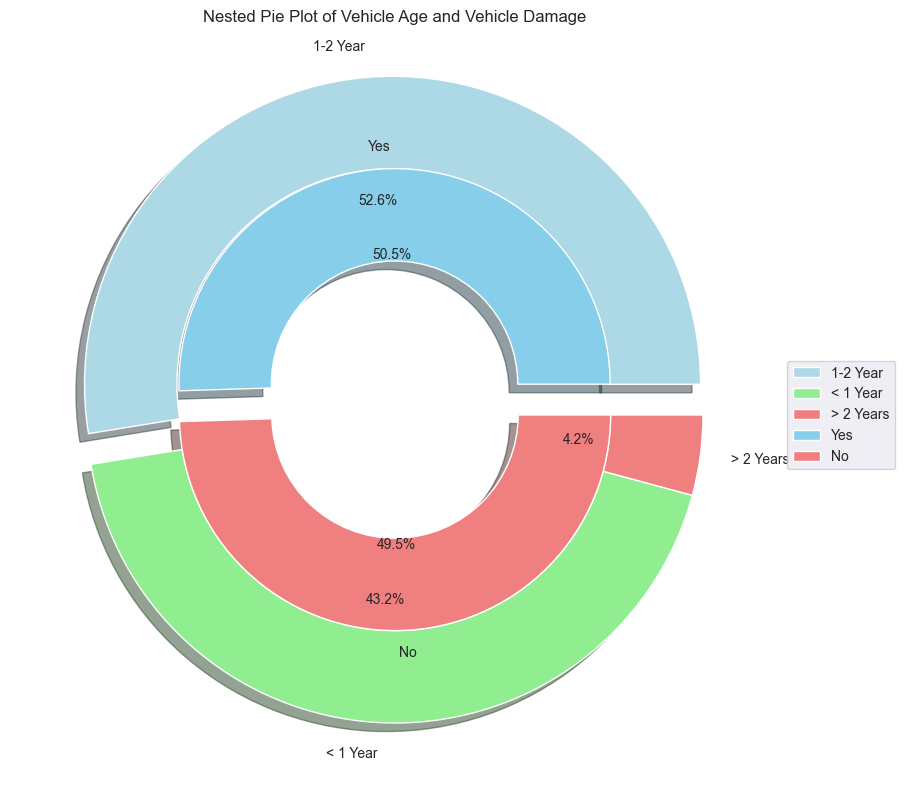

In [13]:
if all(column in df_train.columns and df_train[column].nunique() > 1 for column in ['Vehicle_Age', 'Vehicle_Damage']):
    vehicle_age_counts = df_train['Vehicle_Age'].value_counts()
    vehicle_damage_counts = df_train['Vehicle_Damage'].value_counts()
    
    fig, ax = plt.subplots(figsize=(10, 10))  
    
    explode_outer = (0.1, 0, 0)  
    ax.pie(vehicle_age_counts, labels=vehicle_age_counts.index, autopct='%1.1f%%',
           colors=['lightblue', 'lightgreen', 'lightcoral'], radius=1, shadow=True, explode=explode_outer,
           wedgeprops=dict(width=0.3, edgecolor='w'))
    
    explode_inner = (0.1, 0)
    ax.pie(vehicle_damage_counts, labels=vehicle_damage_counts.index, autopct='%1.1f%%',
           colors=['skyblue', 'lightcoral'], radius=0.7, shadow=True, explode=explode_inner,
           wedgeprops=dict(width=0.3, edgecolor='w'))
    
    ax.set(aspect="equal", title='Nested Pie Plot of Vehicle Age and Vehicle Damage')
    plt.legend(loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))  
    plt.show()
else:
    print("One or both of the 'Vehicle_Age' or 'Vehicle_Damage' columns are missing or do not have enough categories to plot.")

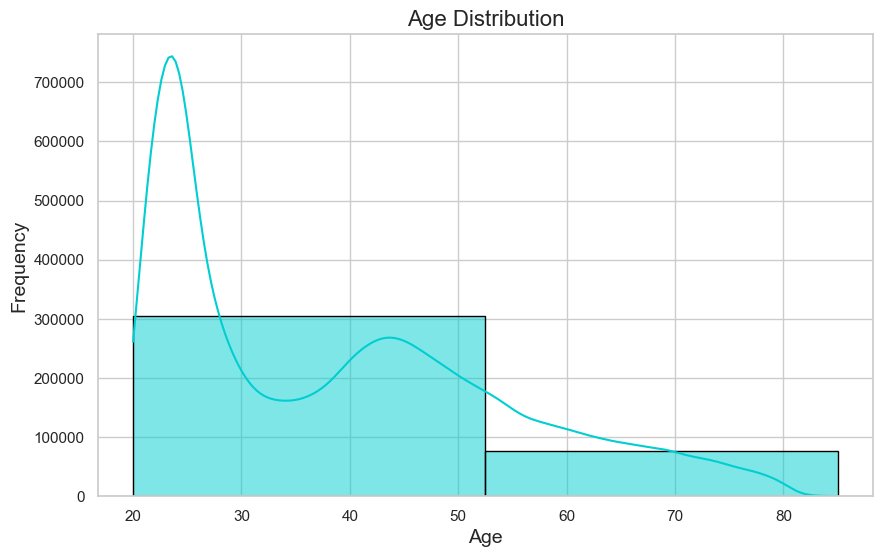

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bin_size = int((df_train['Age'].max() - df_train['Age'].min()) / 30)

sns.histplot(df_train['Age'], bins=bin_size, kde=True, edgecolor='black', color='darkturquoise')

plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

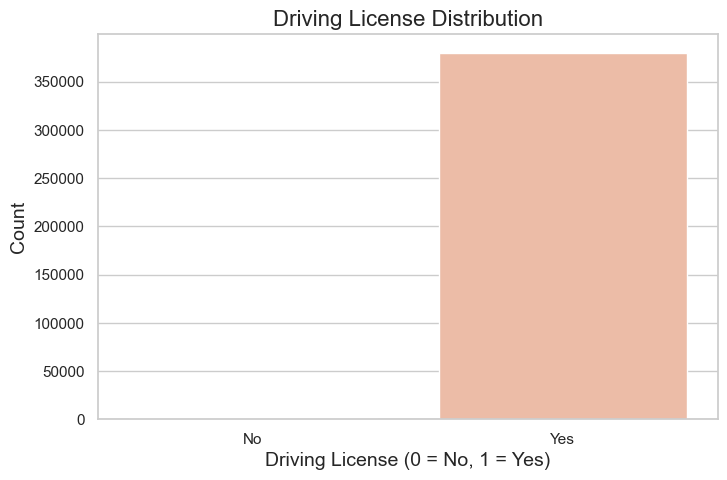

In [15]:
plt.figure(figsize=(8, 5))  
sns.countplot(x='Driving_License', data=df_train, palette='coolwarm')
plt.title('Driving License Distribution', fontsize=16)  
plt.xlabel('Driving License (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Count', fontsize=14)  
plt.xticks([0, 1], ['No', 'Yes'])  
plt.show()

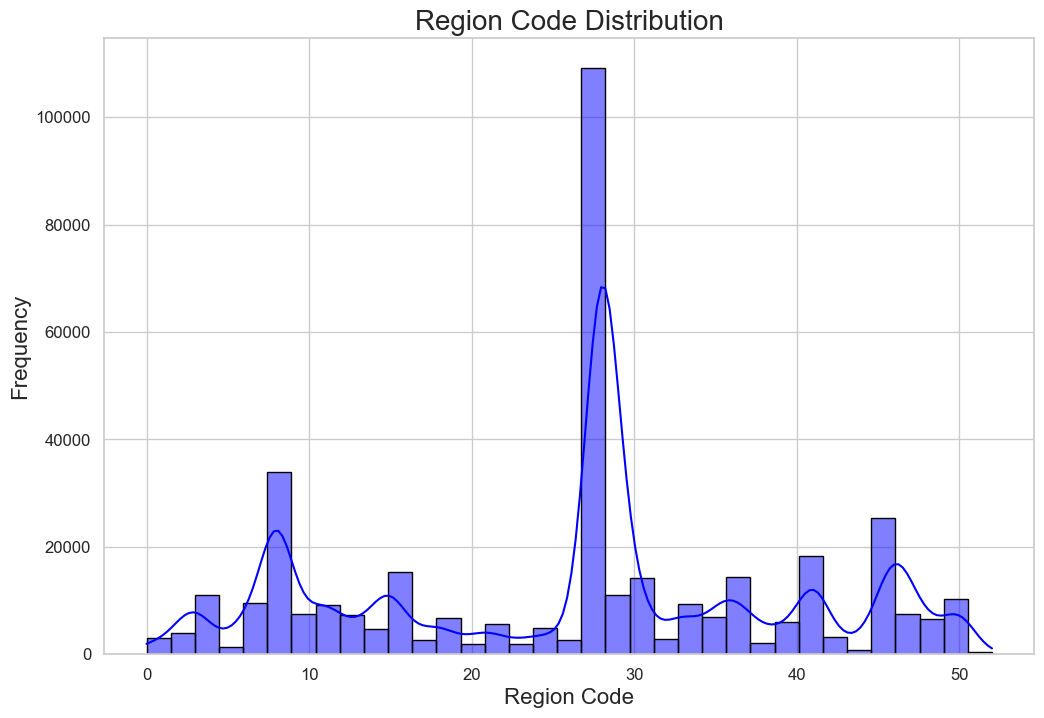

In [16]:
plt.figure(figsize=(12, 8))  
sns.histplot(df_train['Region_Code'], bins=35, kde=True, color='blue', edgecolor='black')
plt.title('Region Code Distribution', fontsize=20)  
plt.xlabel('Region Code', fontsize=16)  
plt.ylabel('Frequency', fontsize=16)  
plt.xticks(fontsize=12)   
plt.yticks(fontsize=12)   
plt.grid(True)
plt.show()

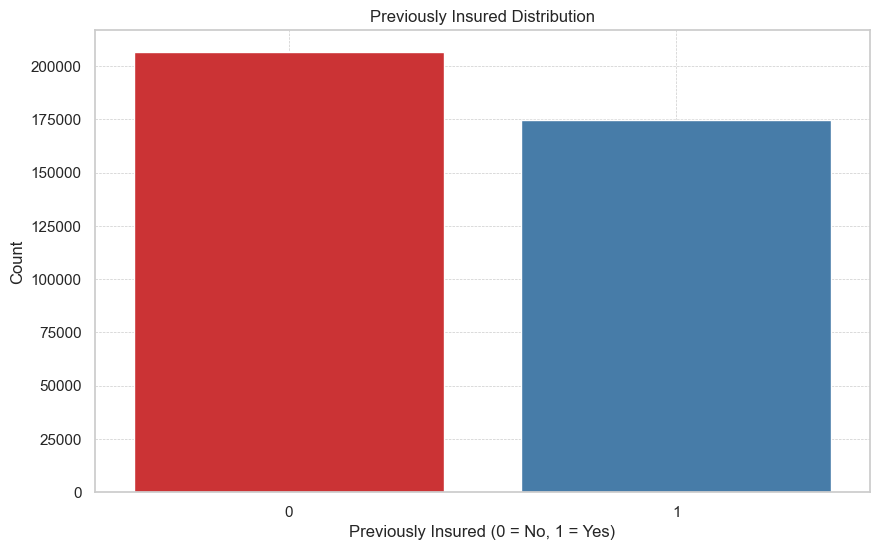

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Previously_Insured', data=df_train, palette='Set1')
plt.title('Previously Insured Distribution')
plt.xlabel('Previously Insured (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

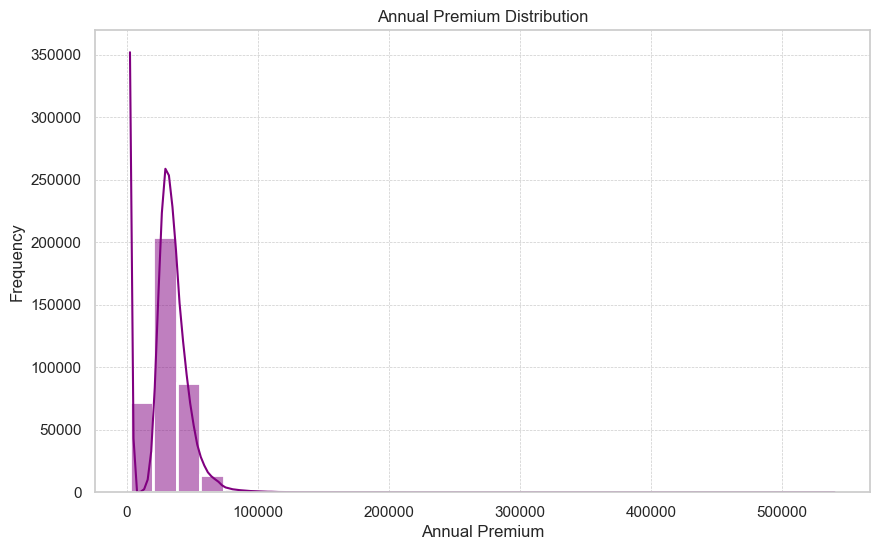

In [18]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_train['Annual_Premium'], bins=30, kde=True, color='purple', linewidth=2)
plt.title('Annual Premium Distribution')
plt.xlabel('Annual Premium')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

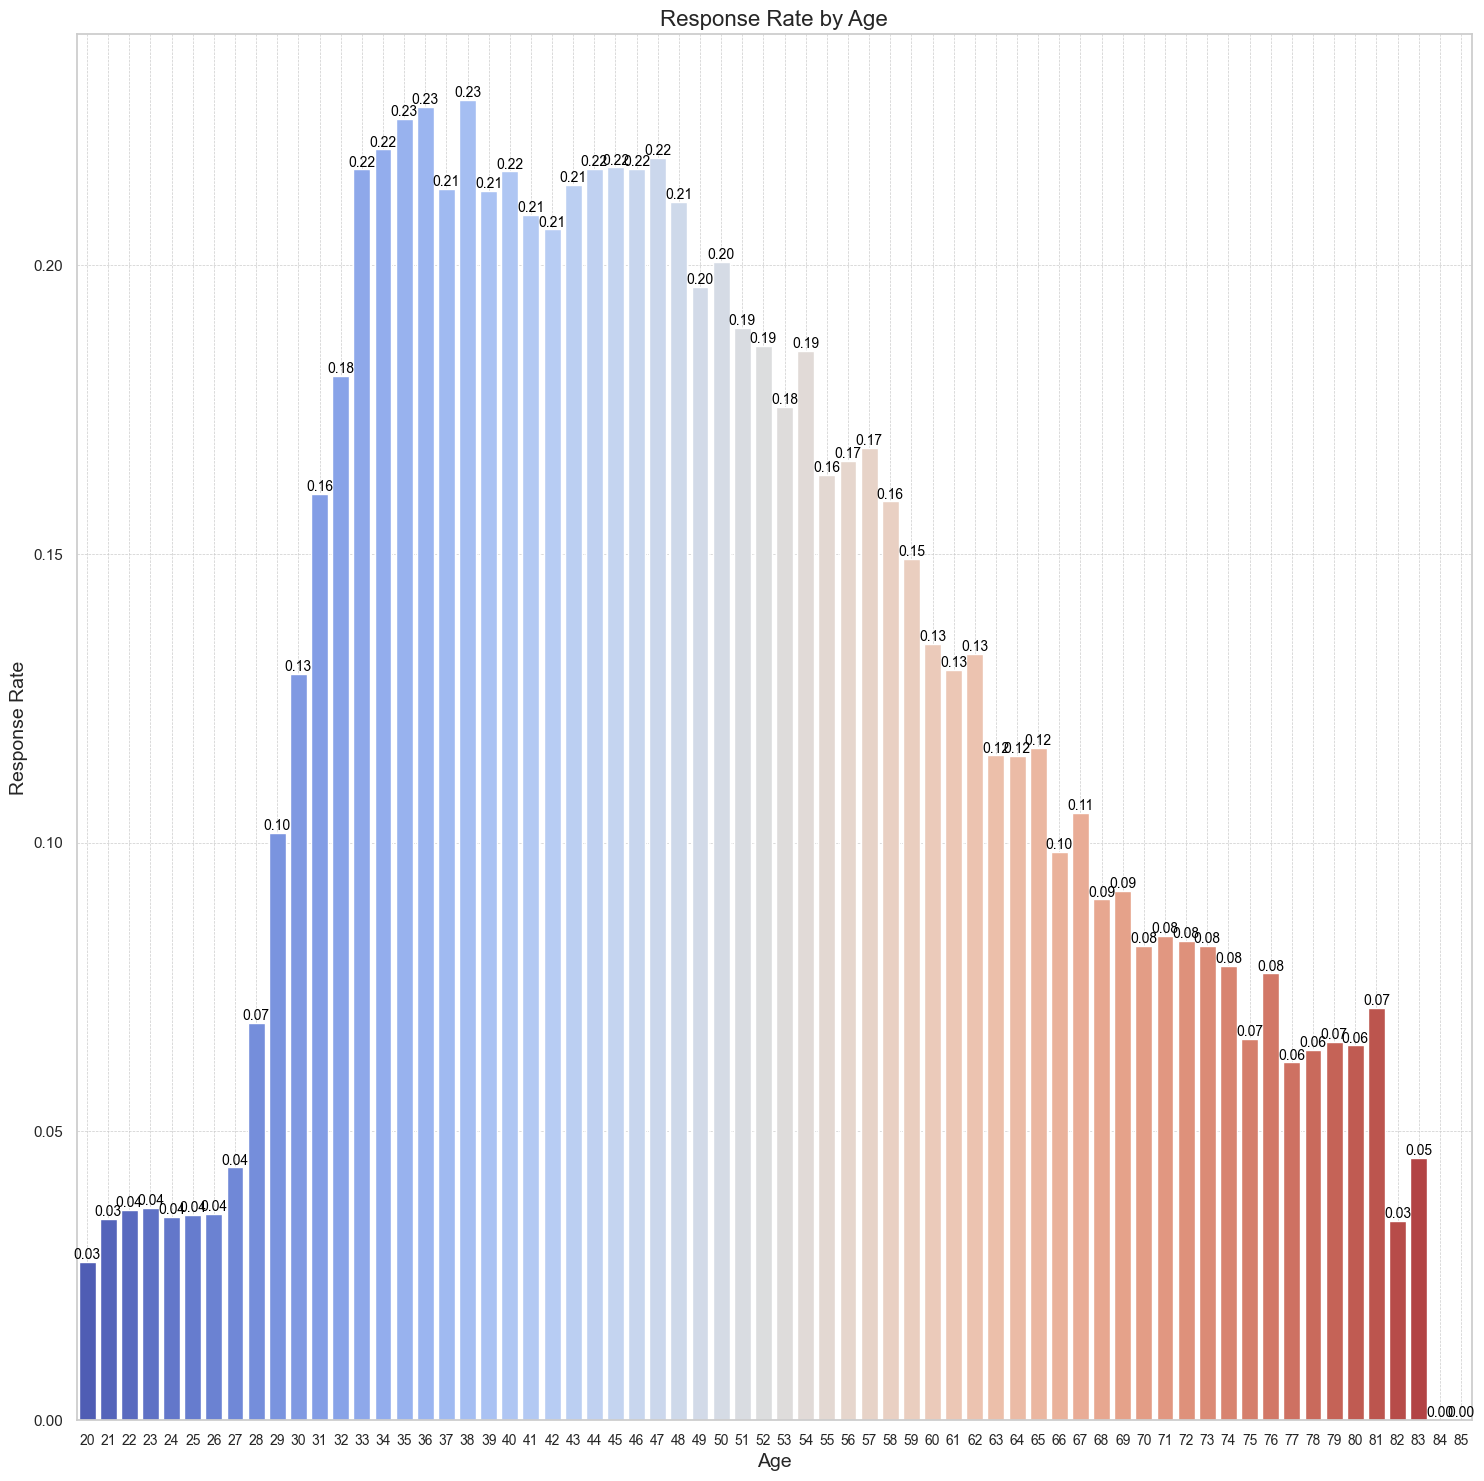

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize=(18, 18))
age_response = df_train.groupby('Age')['Response'].mean().reset_index()
sns.barplot(x='Age', y='Response', data=age_response, palette='coolwarm')
plt.title('Response Rate by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Response Rate', fontsize=14)
plt.xticks(rotation=0, fontsize=10)
for index, row in age_response.iterrows():
    plt.text(row.name, row.Response, f'{row.Response:.2f}', color='black', ha="center", va="bottom", fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

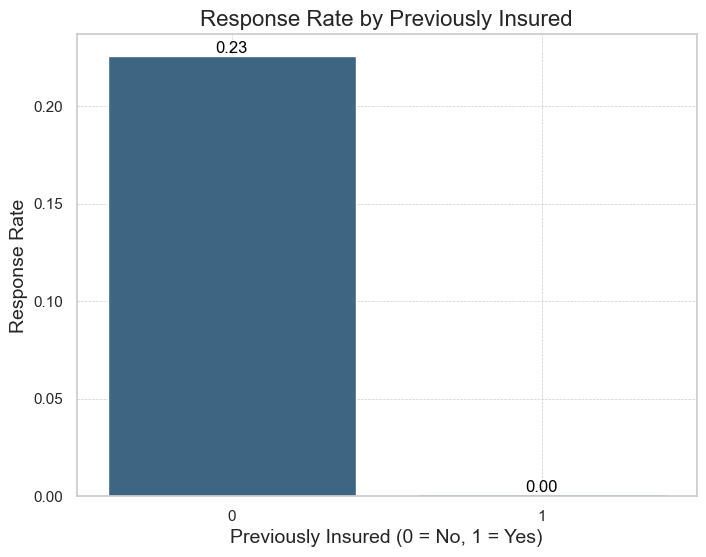

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
insured_response = df_train.groupby('Previously_Insured')['Response'].mean().reset_index()
sns.barplot(x='Previously_Insured', y='Response', data=insured_response, palette='viridis')
plt.title('Response Rate by Previously Insured', fontsize=16)
plt.xlabel('Previously Insured (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Response Rate', fontsize=14)
for index, row in insured_response.iterrows():
    plt.text(row.name, row.Response, f'{row.Response:.2f}', color='black', ha="center", va="bottom", fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

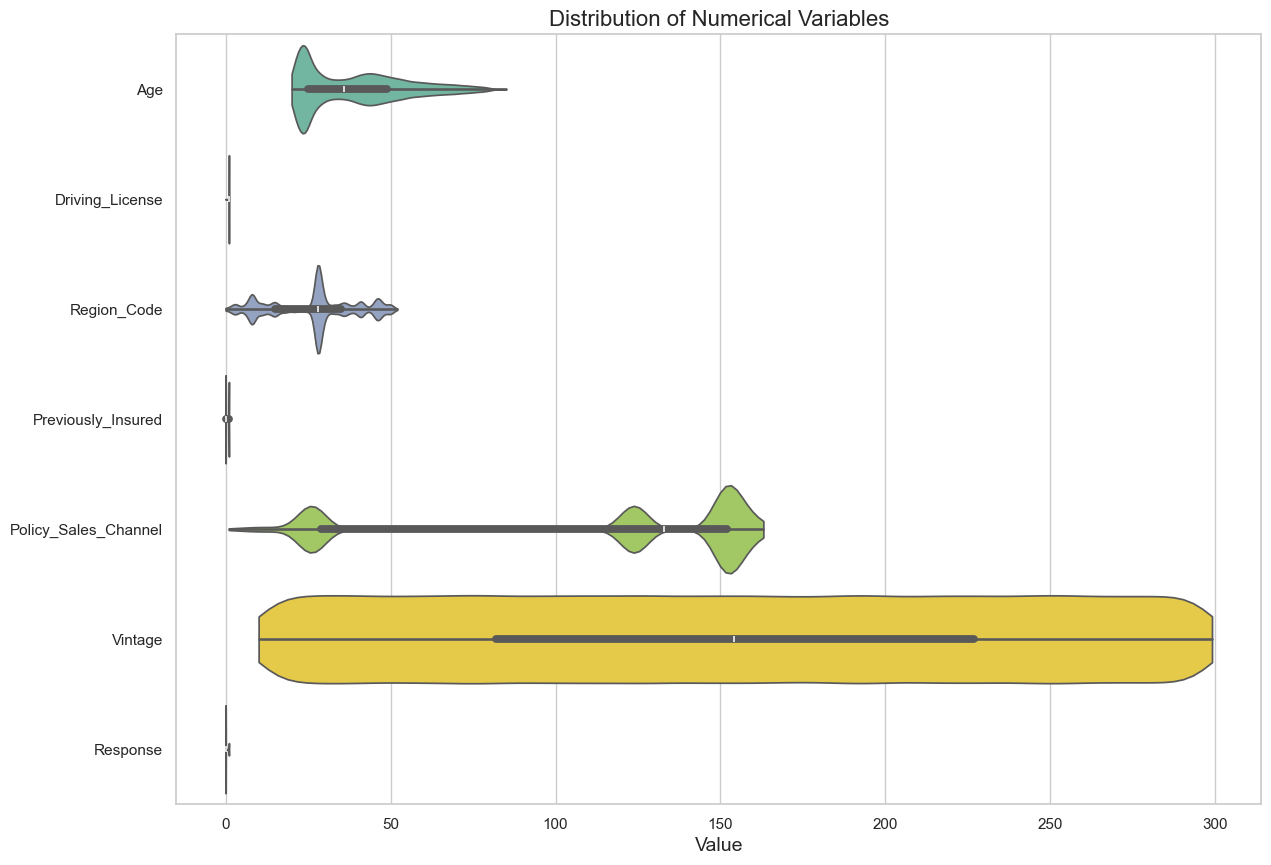

In [21]:
sns.set_style("whitegrid")
numerical_cols = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 
                  'Policy_Sales_Channel', 'Vintage', 'Response']
plt.figure(figsize=(14, 10))
sns.violinplot(data=df_train[numerical_cols], orient='h', palette='Set2', cut=0)
plt.title('Distribution of Numerical Variables', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.show()

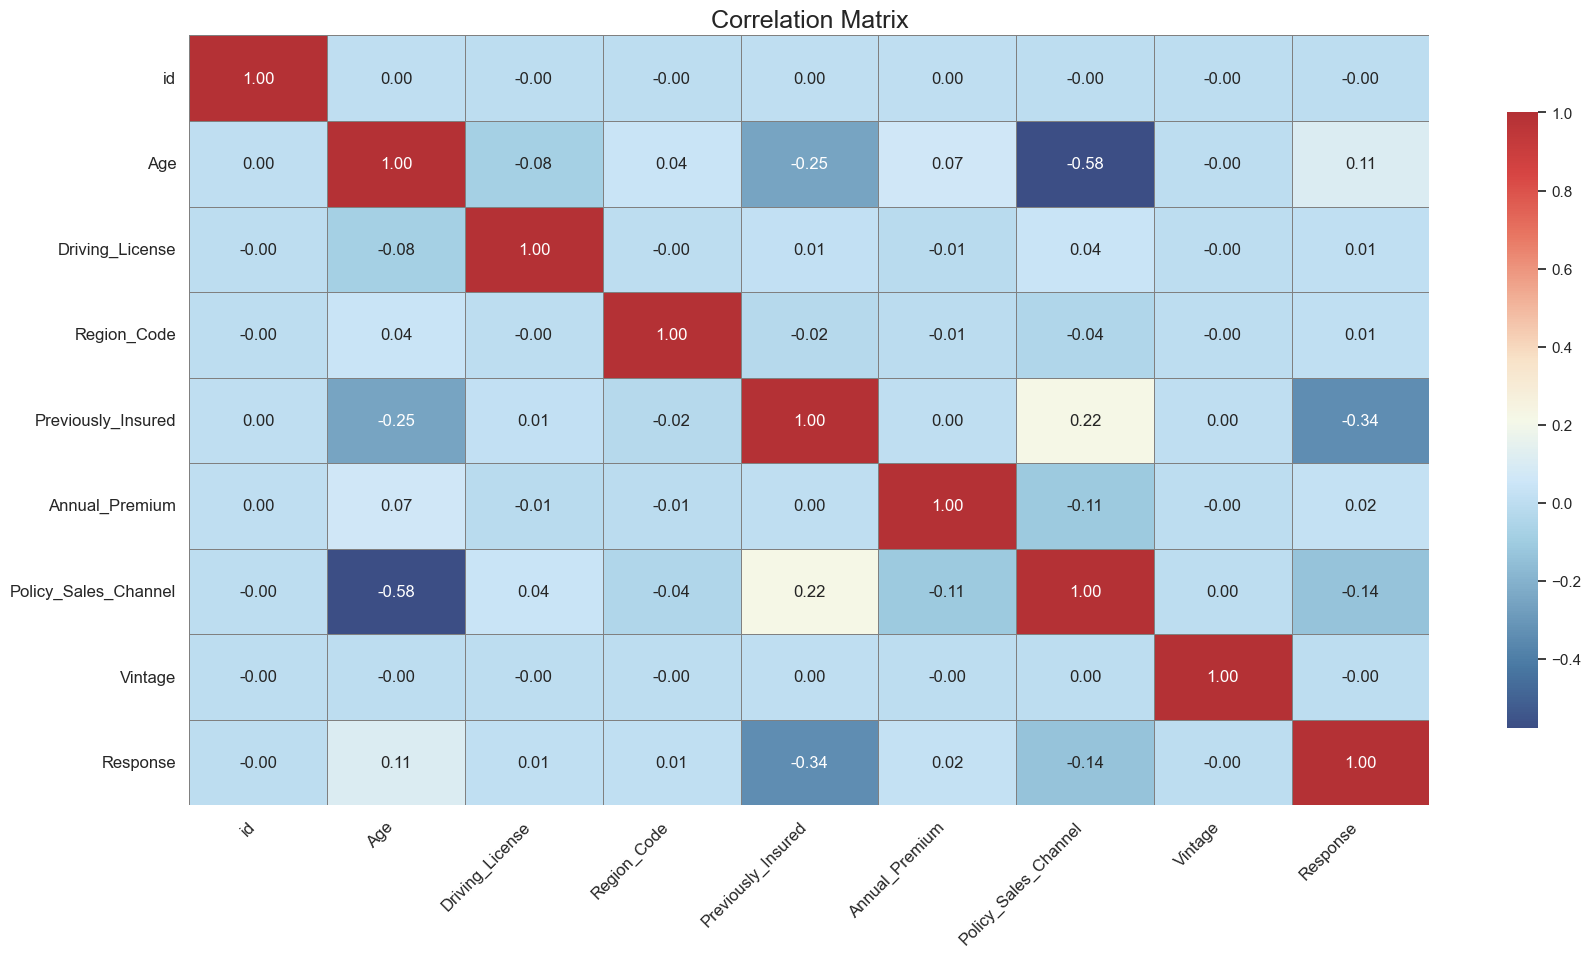

In [22]:
# custom_palette = ["#3C4E85", "#4979A3", "#75A2C1", "#9FCCE1", "#CDE6F8", "#F5F8E8", "#F8E2C8", "#F1AF96", "#E87763", "#D74543", "#B43135"]
# from matplotlib.colors import LinearSegmentedColormap
# cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_palette, N=256)
# correlation_matrix = df_train.corr()
# plt.figure(figsize=(20, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5, linecolor='gray', cbar_kws={"shrink": 0.8})
# plt.title('Correlation Matrix', fontsize=18)
# plt.xticks(rotation=45, ha='right', fontsize=12)
# plt.yticks(rotation=0, fontsize=12)
# plt.show()

df_train_numeric = df_train.select_dtypes(include='number')
custom_palette = ["#3C4E85", "#4979A3", "#75A2C1", "#9FCCE1", "#CDE6F8", "#F5F8E8",
                  "#F8E2C8", "#F1AF96", "#E87763", "#D74543", "#B43135"]
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_palette, N=256)
correlation_matrix = df_train_numeric.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f", linewidths=0.5,
            linecolor='gray', cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()


In [23]:
correlation_matrix

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


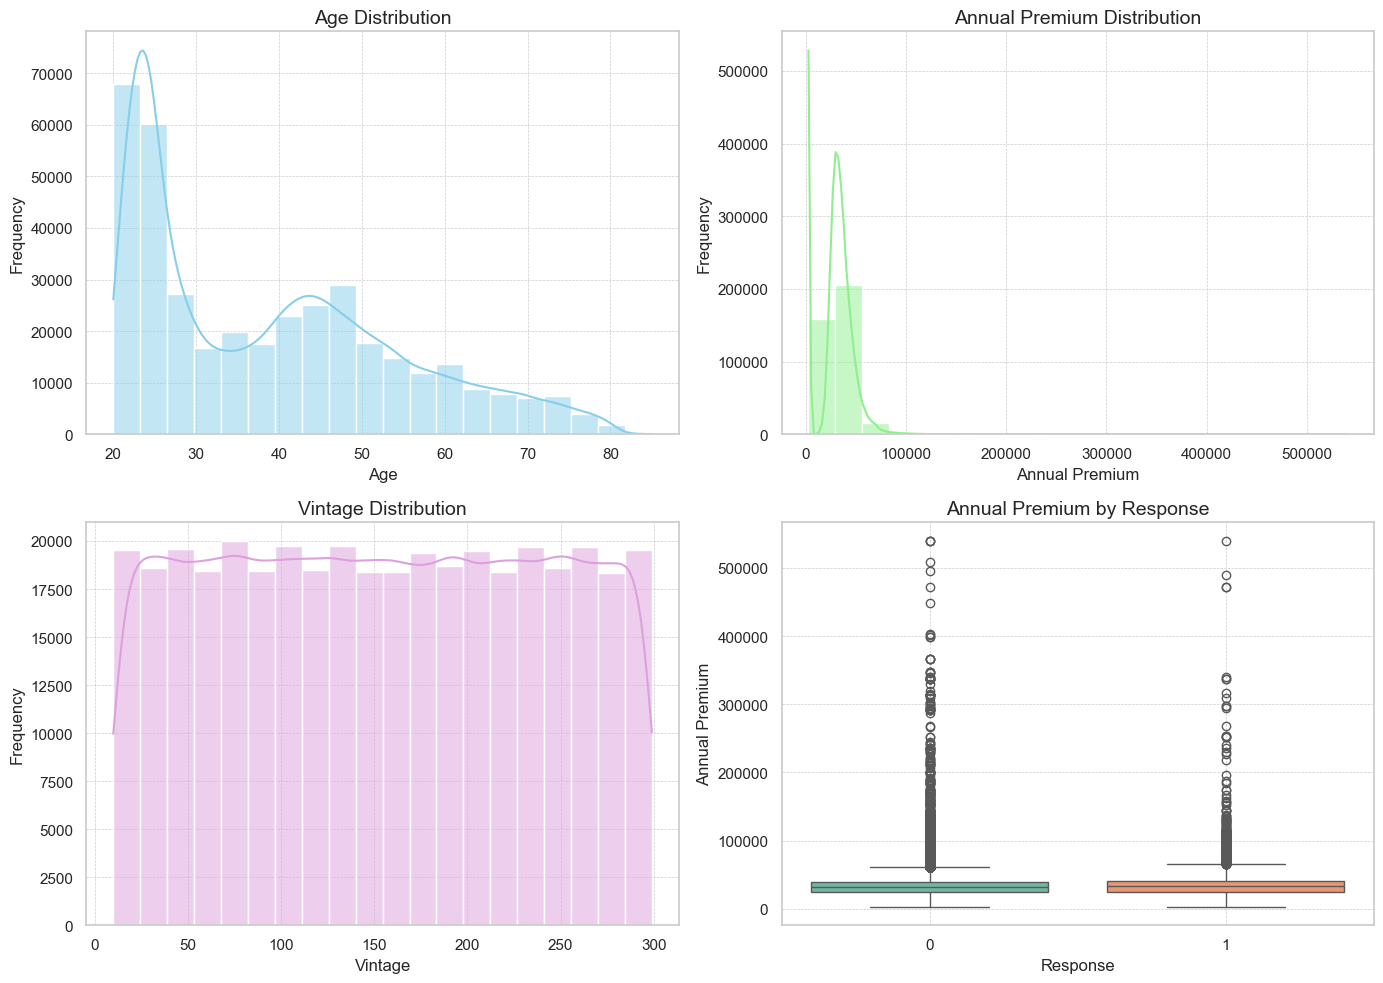

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))

# Subplot 1: Age Distribution
plt.subplot(2, 2, 1)
sns.histplot(df_train['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Subplot 2: Annual Premium Distribution
plt.subplot(2, 2, 2)
sns.histplot(df_train['Annual_Premium'], bins=20, kde=True, color='lightgreen')
plt.title('Annual Premium Distribution', fontsize=14)
plt.xlabel('Annual Premium', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Subplot 3: Vintage Distribution
plt.subplot(2, 2, 3)
sns.histplot(df_train['Vintage'], bins=20, kde=True, color='plum')
plt.title('Vintage Distribution', fontsize=14)
plt.xlabel('Vintage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Subplot 4: Annual Premium by Response
plt.subplot(2, 2, 4)
sns.boxplot(x='Response', y='Annual_Premium', data=df_train, palette='Set2')
plt.title('Annual Premium by Response', fontsize=14)
plt.xlabel('Response', fontsize=12)
plt.ylabel('Annual Premium', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Adjusting the layout to prevent overlap
plt.tight_layout()
plt.show()

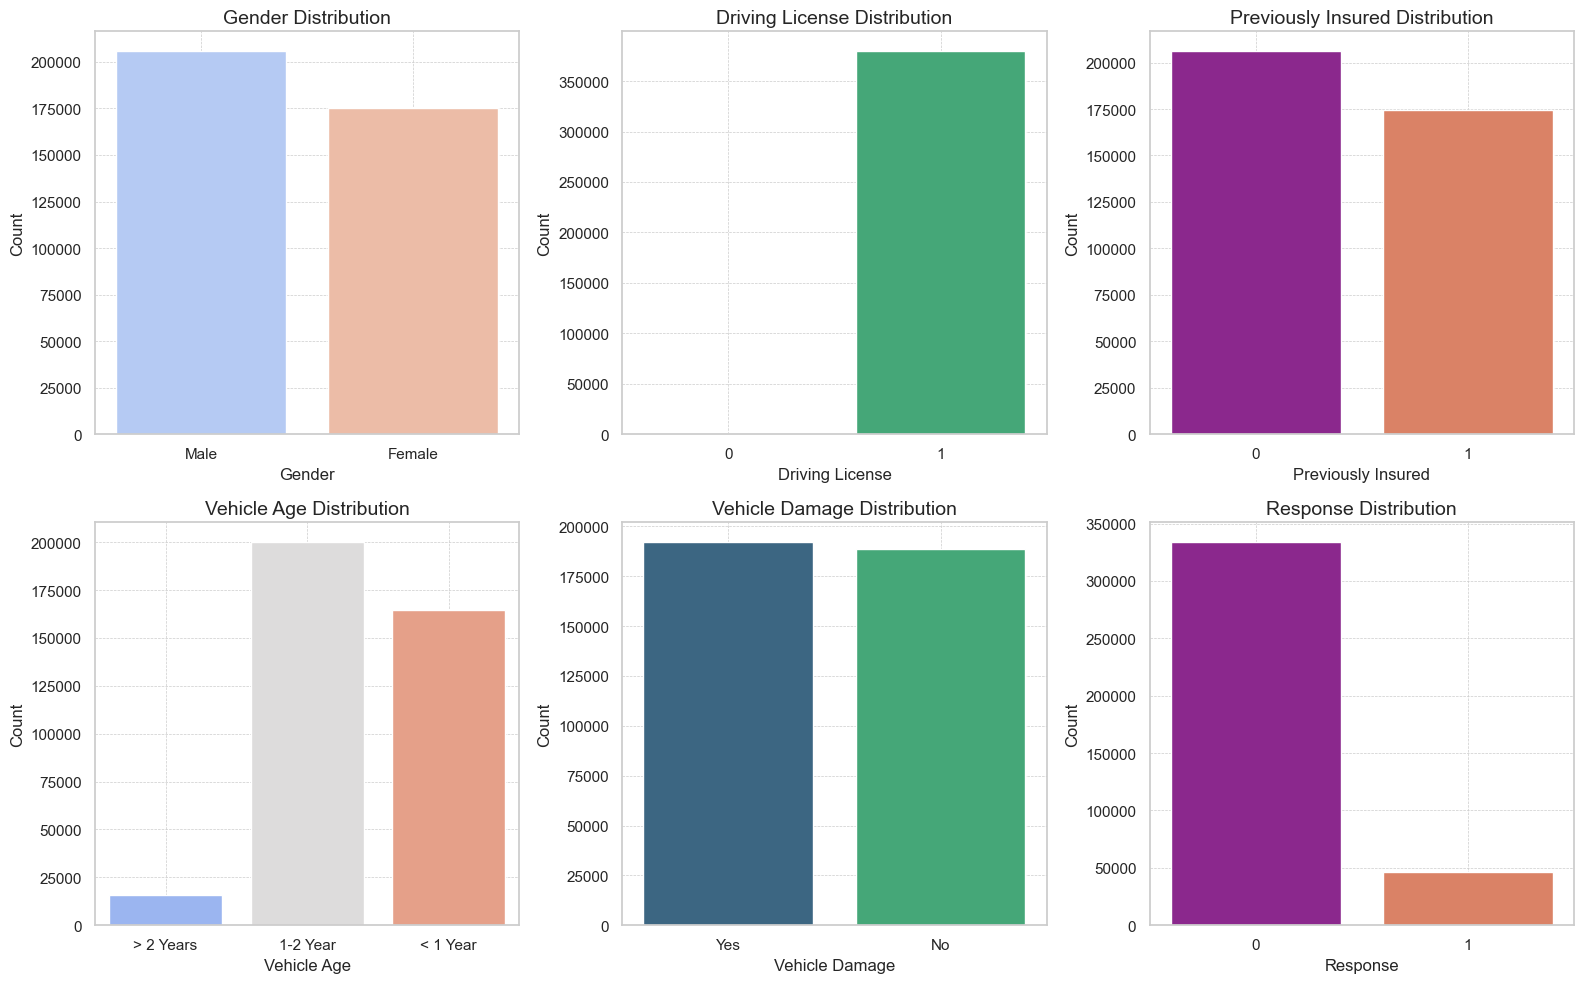

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

# Subplot 1: Gender Distribution
plt.subplot(2, 3, 1)
sns.countplot(x='Gender', data=df_train, palette='coolwarm')
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Subplot 2: Driving License Distribution
plt.subplot(2, 3, 2)
sns.countplot(x='Driving_License', data=df_train, palette='viridis')
plt.title('Driving License Distribution', fontsize=14)
plt.xlabel('Driving License', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Subplot 3: Previously Insured Distribution
plt.subplot(2, 3, 3)
sns.countplot(x='Previously_Insured', data=df_train, palette='plasma')
plt.title('Previously Insured Distribution', fontsize=14)
plt.xlabel('Previously Insured', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Subplot 4: Vehicle Age Distribution
plt.subplot(2, 3, 4)
sns.countplot(x='Vehicle_Age', data=df_train, palette='coolwarm')
plt.title('Vehicle Age Distribution', fontsize=14)
plt.xlabel('Vehicle Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Subplot 5: Vehicle Damage Distribution
plt.subplot(2, 3, 5)
sns.countplot(x='Vehicle_Damage', data=df_train, palette='viridis')
plt.title('Vehicle Damage Distribution', fontsize=14)
plt.xlabel('Vehicle Damage', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

# Subplot 6: Response Distribution
plt.subplot(2, 3, 6)
sns.countplot(x='Response', data=df_train, palette='plasma')
plt.title('Response Distribution', fontsize=14)
plt.xlabel('Response', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

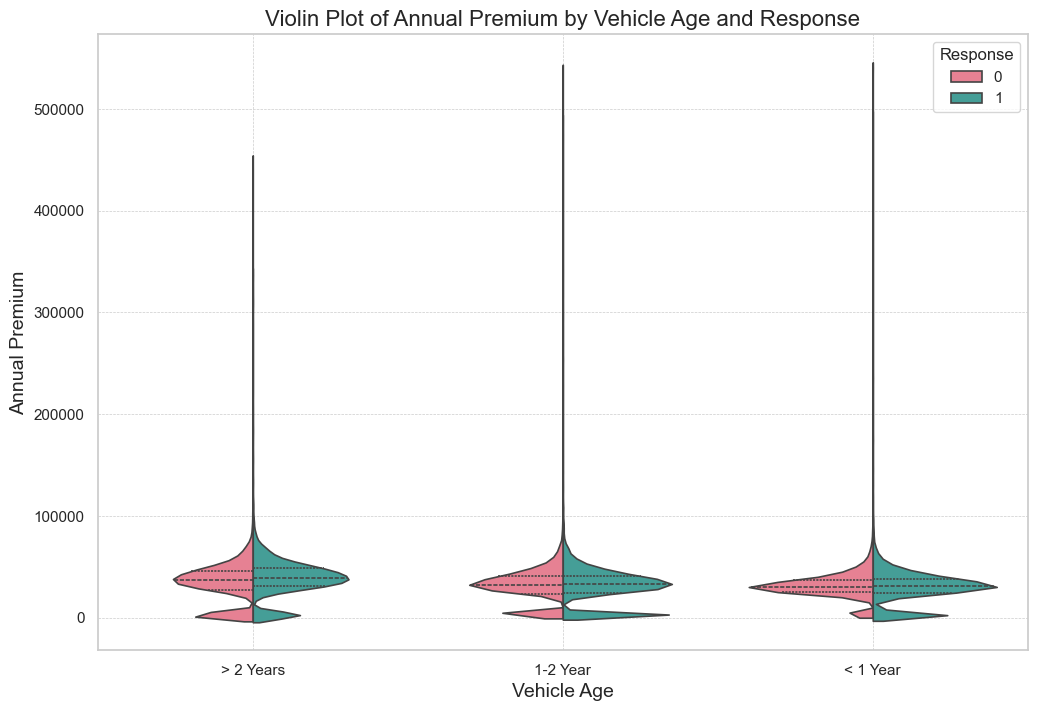

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.violinplot(x='Vehicle_Age', y='Annual_Premium', data=df_train, hue='Response', split=True,
               palette='husl', inner='quartile', linewidth=1.2)
plt.title('Violin Plot of Annual Premium by Vehicle Age and Response', fontsize=16)
plt.xlabel('Vehicle Age', fontsize=14)
plt.ylabel('Annual Premium', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

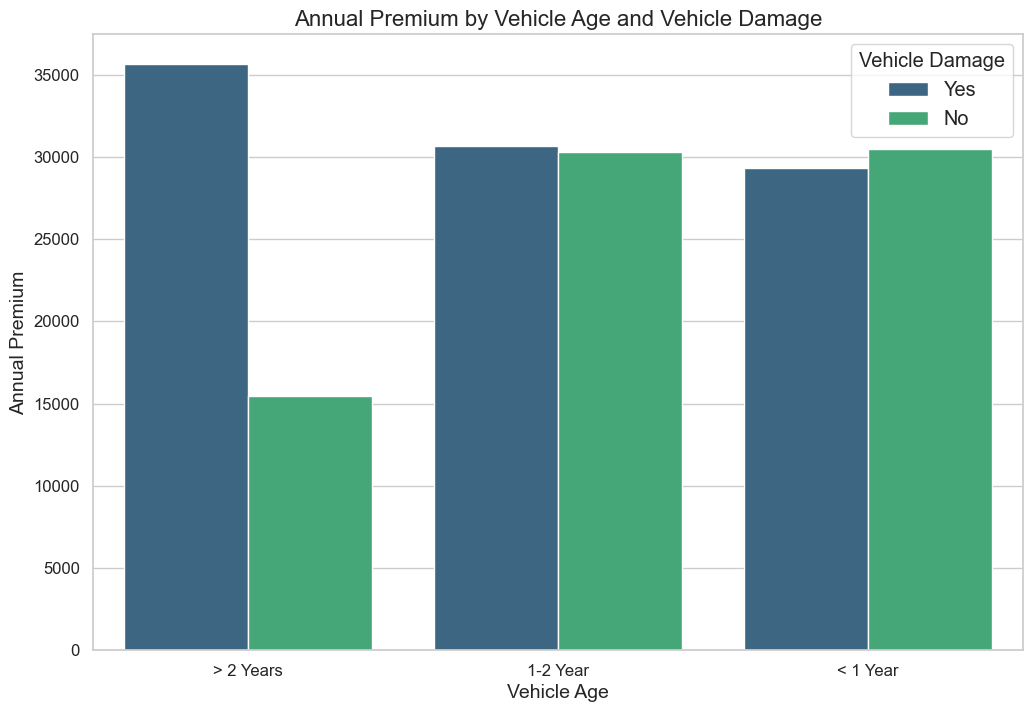

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='Vehicle_Age', y='Annual_Premium', hue='Vehicle_Damage', data=df_train, palette='viridis', ci=None)
plt.title('Annual Premium by Vehicle Age and Vehicle Damage', fontsize=16)
plt.xlabel('Vehicle Age', fontsize=14)
plt.ylabel('Annual Premium', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Vehicle Damage', title_fontsize='large', fontsize='large')
plt.show()

In [28]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [29]:
def feature_engineering(df):
     # 将可能需要运算的列转换为数值型
    numeric_cols = ['Age', 'Vehicle_Age', 'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium']
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
 
    df['Age_Vehicle_Age'] = df['Age'] * df['Vehicle_Age']
    df['Age_Previously_Insured'] = df['Age'] * df['Previously_Insured']
    df['Vehicle_Age_Damage'] = df['Vehicle_Age'] * df['Vehicle_Damage']
    df['Previously_Insured_Damage'] = df['Previously_Insured'] * df['Vehicle_Damage']   
    df['Age_squared'] = df['Age'] ** 2
    df['Vehicle_Age_squared'] = df['Vehicle_Age'] ** 2   
    df['Annual_Premium_per_Age'] = df['Annual_Premium'] / (df['Age'] + 1)
    return df

In [30]:
df_train = feature_engineering(df_train)
df_test = feature_engineering(df_test)

In [31]:
df_train.dtypes

id                             int64
Gender                        object
Age                            int64
Driving_License                int64
Region_Code                  float64
Previously_Insured             int64
Vehicle_Age                  float64
Vehicle_Damage               float64
Annual_Premium               float64
Policy_Sales_Channel         float64
Vintage                        int64
Response                       int64
Age_Vehicle_Age              float64
Age_Previously_Insured         int64
Vehicle_Age_Damage           float64
Previously_Insured_Damage    float64
Age_squared                    int64
Vehicle_Age_squared          float64
Annual_Premium_per_Age       float64
dtype: object

In [32]:
df_train.shape

(381109, 19)

In [33]:
df_test.shape

(127037, 18)

In [34]:
# 将类别型列转换为category类型
categorical_cols = df_train.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_train[col] = df_train[col].astype('category')
    df_test[col] = df_test[col].astype('category')
    
y = df_train['Response'] 
X = df_train.drop(['Response'],axis=1)

In [35]:
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size = 0.2, random_state =41)

In [43]:

#第一次acu是0.8364
# xgb_params = {    
#     'colsample_bytree': 0.48,       
#     'learning_rate': 0.01567,       
#     'max_depth': 10,
#     'min_child_weight': 6,
#     'max_bin': 3500,
#     'n_estimators': 3000,
#     'eval_metric': 'auc',
#     'enable_categorical': True
#     }

# 第二次修改learning_rate=0.01,从开始的0.8364到acu为0.8395
# xgb_params = {    
#     'colsample_bytree': 0.48,       
#     'learning_rate': 0.01,       
#     'max_depth': 10,
#     'min_child_weight': 6,
#     'max_bin': 3500,
#     'n_estimators': 3000,
#     'eval_metric': 'auc',
#     'enable_categorical': True
#     }

# max_depth=8,从第二次'max_depth': 10到'max_depth': 8的acu为0.8405
xgb_params = {    
    'colsample_bytree': 0.48,       
    'learning_rate': 0.01567,        
    'max_depth': 8,
    'min_child_weight': 6,
    'max_bin': 3500,
    'n_estimators': 3000,
    'eval_metric': 'auc',
    'enable_categorical': True
    }


In [44]:
model=XGBRegressor(**xgb_params)
XGB=model.fit(train_X,train_y)
prediction=XGB.predict(test_X)

In [45]:
test_pred = XGB.predict(df_test)

In [46]:
sample_submission

,id,Response
0,381110,0.014621
1,381111,0.344507
2,381112,0.168893
3,381113,-0.008683
4,381114,0.017346
...,...,...
127032,508142,-0.028417
127033,508143,0.484472
127034,508144,0.009325
127035,508145,-0.055358


In [47]:
sample_submission.Response= test_pred

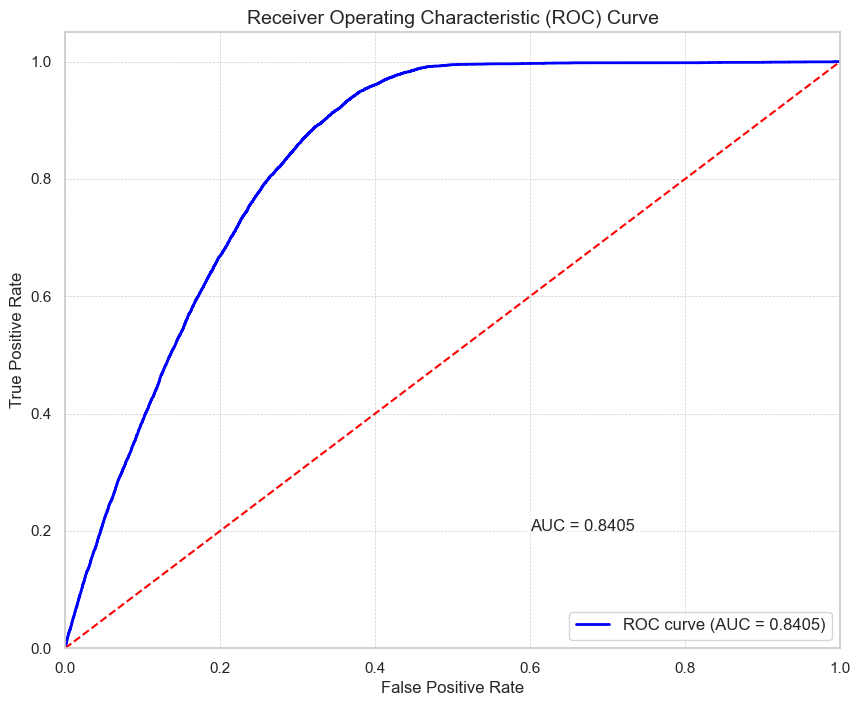

In [48]:
test_pred = XGB.predict(test_X)
fpr, tpr, thresholds = roc_curve(test_y, test_pred)
auc = roc_auc_score(test_y, test_pred)

plt.figure(figsize=(10, 8))
# plt.style.use('seaborn-whitegrid')
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.4f)' % auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.text(0.6, 0.2, f'AUC = {auc:.4f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

In [42]:
sample_submission.to_csv('XGB_submission.csv', index = False)
pd.read_csv('XGB_submission.csv')

,id,Response
0,381110,0.014621
1,381111,0.344507
2,381112,0.168893
3,381113,-0.008683
4,381114,0.017346
...,...,...
127032,508142,-0.028417
127033,508143,0.484472
127034,508144,0.009325
127035,508145,-0.055358
